# Triple Exponential Model

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\DL_TSA\SBUX.US_D1.csv")
data.rename(columns={"datetime":"Date"}, inplace=True)
data.head(5)

,Date,open,high,low,close,volume
0,1998-01-02,38.38,38.63,37.31,37.50,594000
1,1998-01-05,37.63,37.78,36.75,37.13,644000
2,1998-01-06,37.13,37.38,35.56,35.63,1183300
3,1998-01-07,35.50,36.44,34.25,34.69,2039005
4,1998-01-08,34.56,36.01,34.00,35.76,1638105


In [3]:
data.tail()

,Date,open,high,low,close,volume
6610,2024-02-08,95.36,96.69,93.93,96.66,6542671
6611,2024-02-09,96.64,97.99,96.29,97.29,5650189
6612,2024-02-10,97.28,97.30,97.28,97.30,1567069
6613,2024-02-12,96.88,97.14,95.38,95.47,4165595
6614,2024-02-13,95.47,95.56,93.39,93.87,5224870


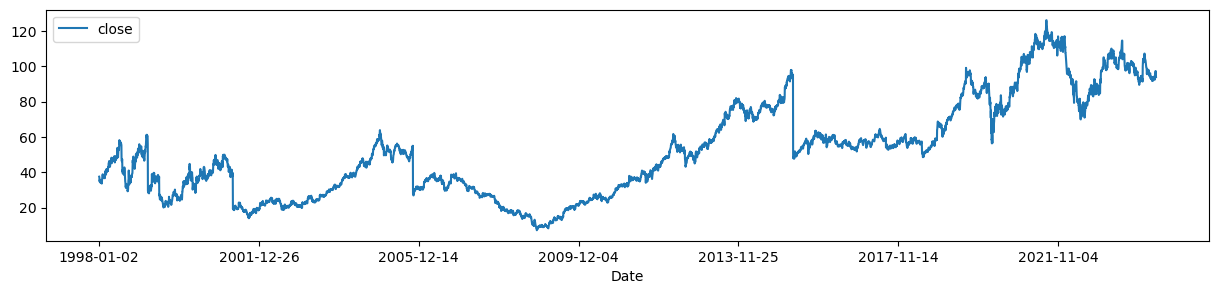

In [4]:
data.plot.line(x = 'Date',y = 'close',figsize=(15,3))
plt.show()  # Trend , Seasonal

In [5]:
data2 = data.set_index("Date")
data2 = data2['close']
data2.head()

Date
1998-01-02    37.50
1998-01-05    37.13
1998-01-06    35.63
1998-01-07    34.69
1998-01-08    35.76
Name: close, dtype: float64

abc=np.array([0.88,0.93,1.04,1.02,0.96,1.07,1.17,1.17,1.07,0.94,0.82,0.93])

#### Auto Model

In [6]:
model2 = ExponentialSmoothing(data2,trend='add',seasonal='mul',seasonal_periods=12).fit()
model2.params
          # initial_seasons=np.array([0.88,0.93,1.04,1.02,0.96,1.07,1.17,1.17,1.07,0.94,0.82,0.93]))

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.9592522844115982,
 'smoothing_trend': 2.1097018687598376e-09,
 'smoothing_seasonal': 5.654688384471095e-12,
 'damping_trend': nan,
 'initial_level': 29.412352216530717,
 'initial_trend': 0.006629962068696179,
 'initial_seasons': array([1.27385179, 1.27670988, 1.27663204, 1.27901   , 1.27859909,
        1.27761926, 1.27695422, 1.2782818 , 1.27654299, 1.27534408,
        1.27698854, 1.27377278]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [7]:
df = pd.DataFrame(
    np.c_[data.close, model2.level, model2.trend, model2.season,model2.fittedvalues],
    columns=["Actual","Level","Trend","Seasonal","Forecast"])
df

,Actual,Level,Trend,Seasonal,Forecast
0,37.50,29.437489,0.00663,1.273852,37.475423
1,37.13,29.097299,0.00663,1.276710,37.591598
2,35.63,27.958049,0.00663,1.276632,37.155008
3,34.69,27.156855,0.00663,1.279010,35.767104
4,35.76,27.935323,0.00663,1.278599,34.731207
...,...,...,...,...,...
6610,96.66,75.656521,0.00663,1.276989,95.494533
6611,97.29,76.350214,0.00663,1.273773,96.377662
6612,97.30,76.381466,0.00663,1.273852,97.267303
6613,95.47,74.843749,0.00663,1.276710,97.525437


In [8]:
mean_absolute_percentage_error = np.mean(np.abs(df.Actual - df.Forecast)/np.abs(df.Actual))*100
mean_absolute_percentage_error

1.5425117482594224

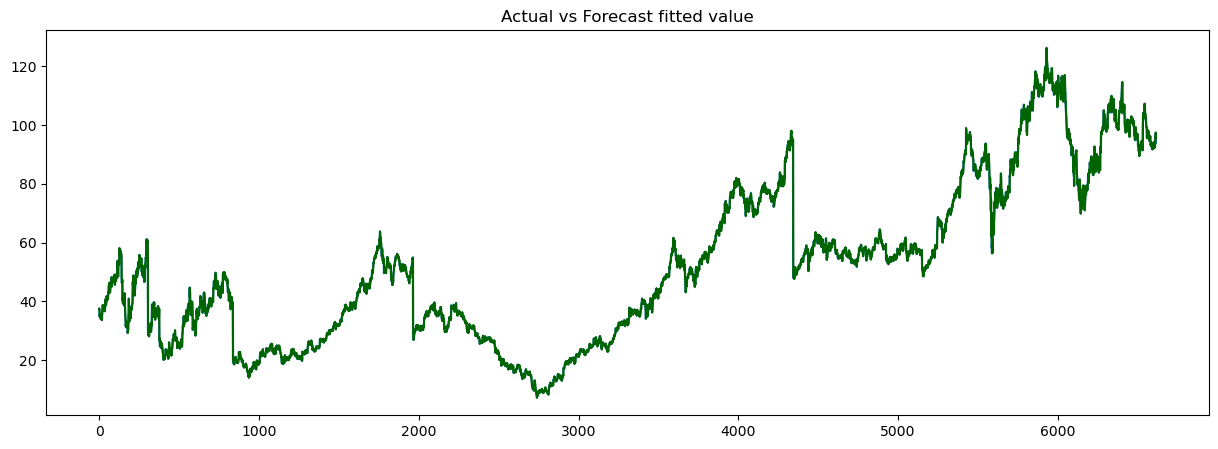

In [9]:
# Plot
plt.figure(figsize=(15,5))
plt.plot(df.Actual)
plt.plot(df.Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

### Future Forecast 

In [10]:
Forecast2 = model2.forecast(300)
Forecast2

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


6615    94.122175
6616    94.100413
6617    94.036772
6618    93.996289
6619    94.102486
          ...    
6910    96.470999
6911    96.236508
6912    96.250923
6913    96.475342
6914    96.477923
Length: 300, dtype: float64

#### Forecast Plot

<Axes: xlabel='Date'>

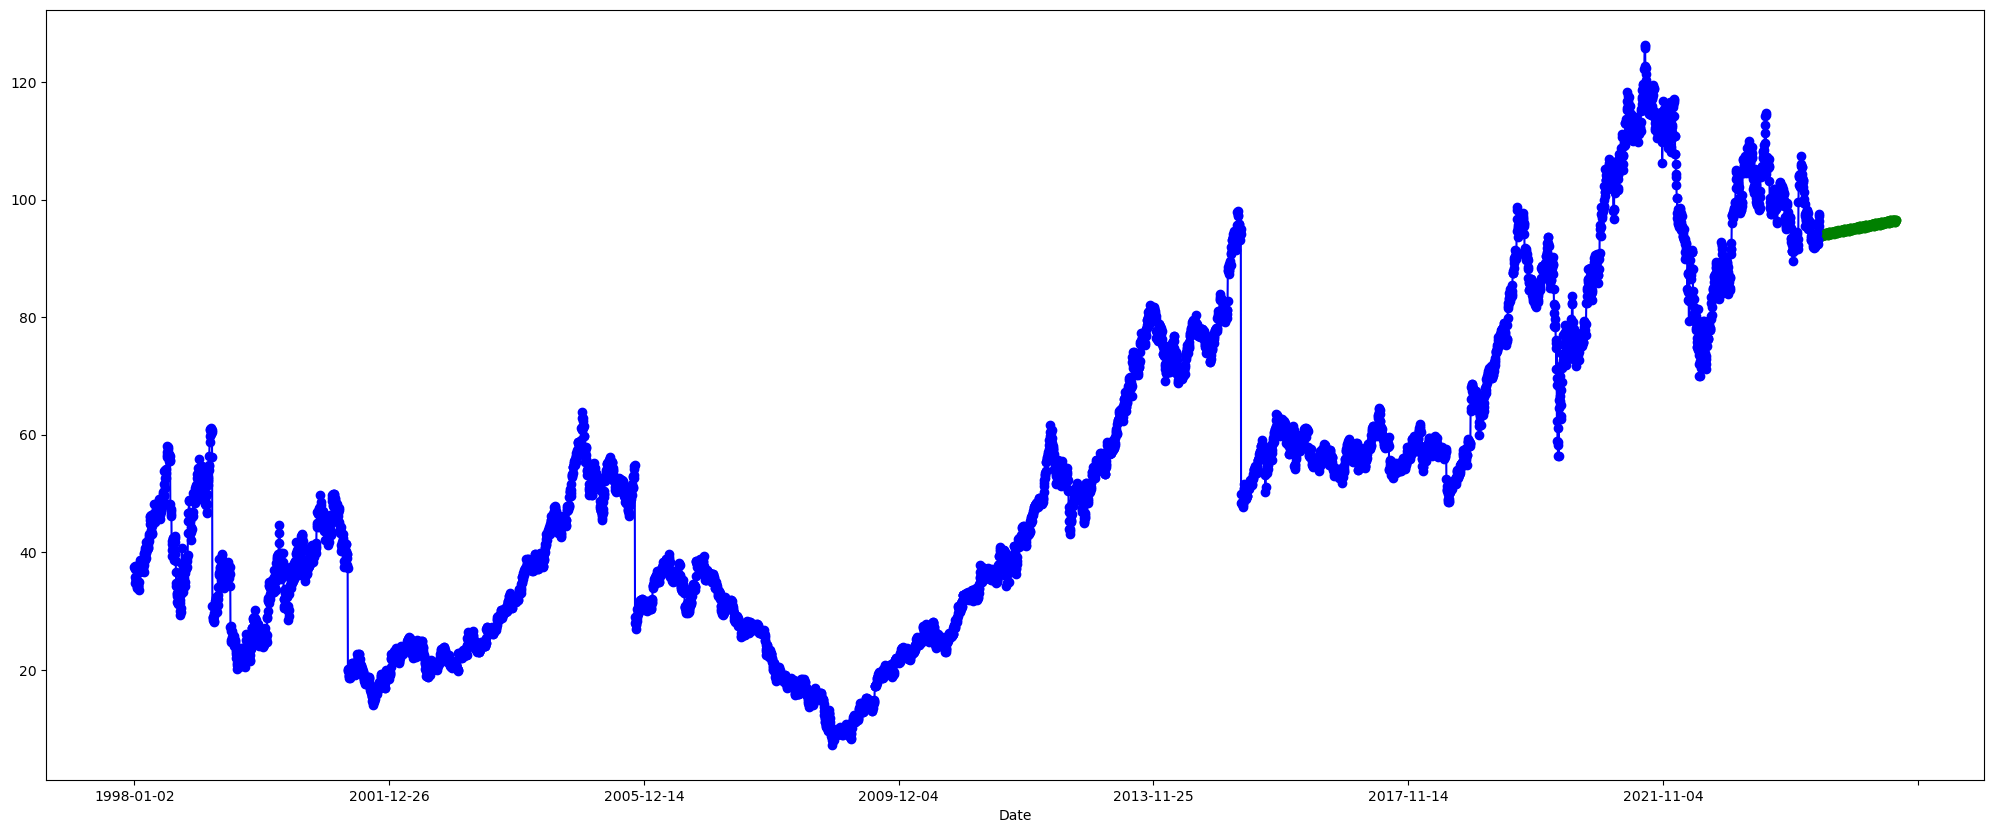

In [11]:
# plot
plt.figure(figsize=(15,10))
Forecast2.plot(marker='o', color='green')
model2.fittedvalues.plot(marker='o',  color='blue',figsize=(25,10))

In [12]:
data2["Forecast"]=model2.fittedvalues
data2.tail()

Date
2024-02-09                                                97.29
2024-02-10                                                 97.3
2024-02-12                                                95.47
2024-02-13                                                93.87
Forecast      Date
1998-01-02    37.475423
1998-01-05    37....
Name: close, dtype: object

#### Accuracy of Model

# Finished 